In [1]:
import pandas as pd

# CSV file is in the same directory as Python script
file_path = "COVID-19_cases_plus_census.csv"

# Read the CSV file into a DataFrame
cases = pd.read_csv(file_path)

# Now, 'cases' contains the data from the CSV file

In [2]:
# Filter rows with confirmed_cases > 0
cases = cases[cases['confirmed_cases'] > 0]

# Calculate rates per 1000 people and add them as new columns
cases['cases_per_1000'] = (cases['confirmed_cases'] / cases['total_pop']) * 1000
cases['deaths_per_1000'] = (cases['deaths'] / cases['total_pop']) * 1000
cases['death_per_case'] = cases['deaths'] / cases['confirmed_cases']

# Sort the DataFrame by confirmed_cases in descending order
cases = cases.sort_values(by='confirmed_cases', ascending=False)

# Select important variables (columns) you want to keep
selected_columns = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop', 'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000', 'death_per_case']
cases = cases[selected_columns]

# Print the resulting DataFrame
print(cases)

             county_name state  confirmed_cases  deaths   total_pop  \
287   Los Angeles County    CA          1002614   13936  10105722.0   
832          Cook County    IL           435888    8544   5238541.0   
245      Maricopa County    AZ           425844    6443   4155501.0   
430    Miami-Dade County    FL           347965    4622   2702602.0   
2782       Harris County    TX           286356    3825   4525519.0   
...                  ...   ...              ...     ...         ...   
365      Hinsdale County    CO               15       0       820.0   
1678    Petroleum County    MT               11       1       453.0   
2543         King County    TX               11       0       289.0   
1981      Harding County    NM                8       0       546.0   
2551       Loving County    TX                1       0        74.0   

      median_income  median_age  cases_per_1000  deaths_per_1000  \
287         61015.0        36.0       99.212506         1.379021   
832        

In [27]:
# Print the column names in the 'cases' DataFrame
print(cases.columns)

# Select the desired columns
selected_columns = ['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop',
       'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000',
       'death_per_case']

cases_sel = cases[selected_columns]

# Normalize columns by population
population_columns = ['total_pop','cases_per_1000', 'deaths_per_1000',
       'death_per_case']

cases_sel[population_columns] = cases_sel[population_columns].div(cases_sel['total_pop'], axis=0)

# Print the resulting DataFrame
print(cases_sel)

Index(['county_name', 'state', 'confirmed_cases', 'deaths', 'total_pop',
       'median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000',
       'death_per_case'],
      dtype='object')
             county_name state  confirmed_cases  deaths  total_pop  \
287   Los Angeles County    CA          1002614   13936        1.0   
832          Cook County    IL           435888    8544        1.0   
245      Maricopa County    AZ           425844    6443        1.0   
430    Miami-Dade County    FL           347965    4622        1.0   
2782       Harris County    TX           286356    3825        1.0   
...                  ...   ...              ...     ...        ...   
365      Hinsdale County    CO               15       0        1.0   
1678    Petroleum County    MT               11       1        1.0   
2543         King County    TX               11       0        1.0   
1981      Harding County    NM                8       0        1.0   
2551       Loving County    TX    

In [11]:
# have the 'cases_sel' DataFrame
summary = cases_sel.describe()

# Print the summary statistics
print(summary)

       confirmed_cases        deaths  total_pop  median_income   median_age  \
count     3.139000e+03   3139.000000     3139.0    3139.000000  3139.000000   
mean      7.566138e+03    124.945524        1.0   49736.142083    41.148901   
std       2.811232e+04    481.075014        0.0   13145.573334     5.372906   
min       1.000000e+00      0.000000        1.0   19264.000000    21.600000   
25%       7.985000e+02     12.000000        1.0   41120.000000    37.900000   
50%       1.917000e+03     32.000000        1.0   48038.000000    41.200000   
75%       4.955500e+03     77.000000        1.0   55758.000000    44.200000   
max       1.002614e+06  13936.000000        1.0  129588.000000    66.400000   

       cases_per_1000  deaths_per_1000  death_per_case  
count     3139.000000      3139.000000    3.139000e+03  
mean         0.006995         0.000133    1.762310e-06  
std          0.013815         0.000401    7.554887e-06  
min          0.000010         0.000000    0.000000e+00  
25%

In [13]:
# Check for missing values
missing_values = cases_sel.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
county_name        0
state              0
confirmed_cases    0
deaths             0
total_pop          0
median_income      0
median_age         0
cases_per_1000     0
deaths_per_1000    0
death_per_case     0
dtype: int64


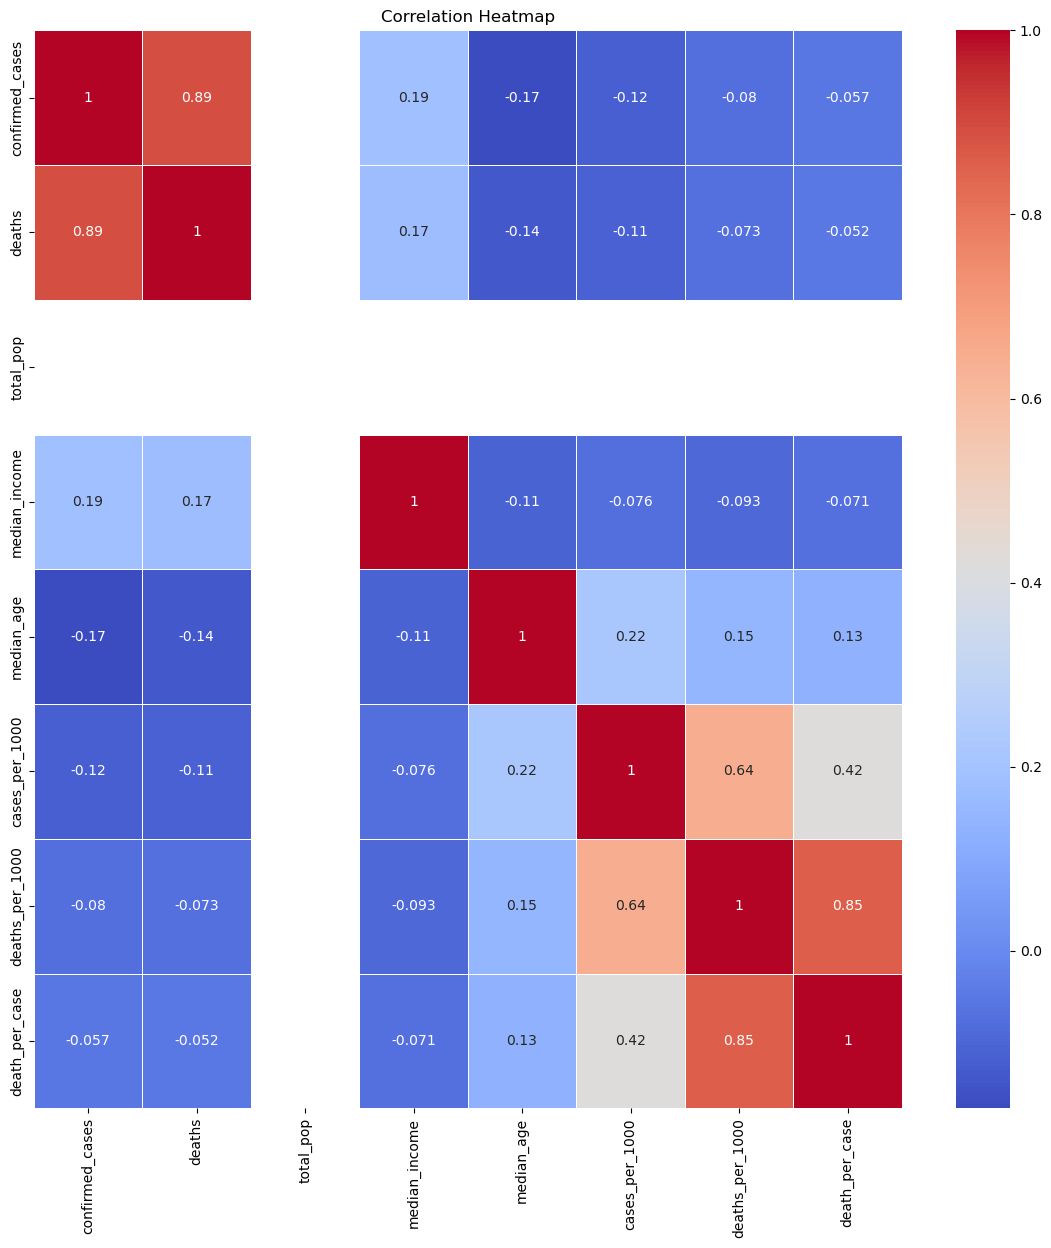

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns and drop rows with missing values
numeric_cols = cases_sel.select_dtypes(include=['number'])
numeric_cols = numeric_cols.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

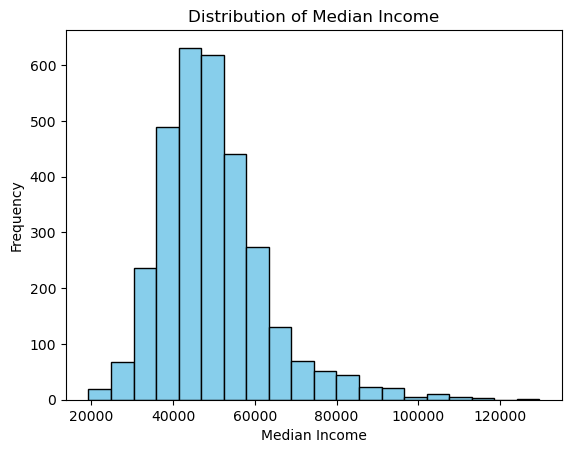

In [22]:
import matplotlib.pyplot as plt

# Visualization for 'median_income' column
plt.hist(cases_sel['median_income'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')
plt.show()

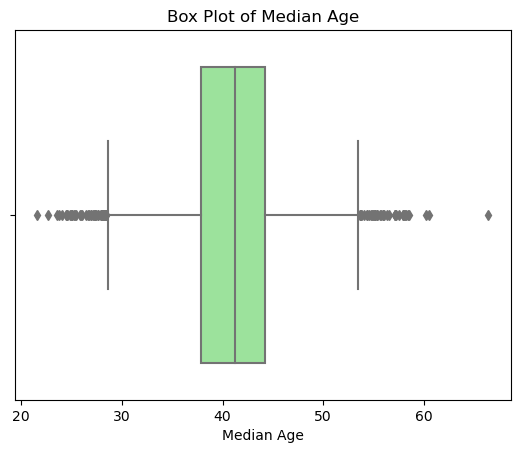

In [23]:
import seaborn as sns

# Visualization for 'median_age' column
sns.boxplot(x=cases_sel['median_age'], color='lightgreen')
plt.xlabel('Median Age')
plt.title('Box Plot of Median Age')
plt.show()

C:\Users\morga\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


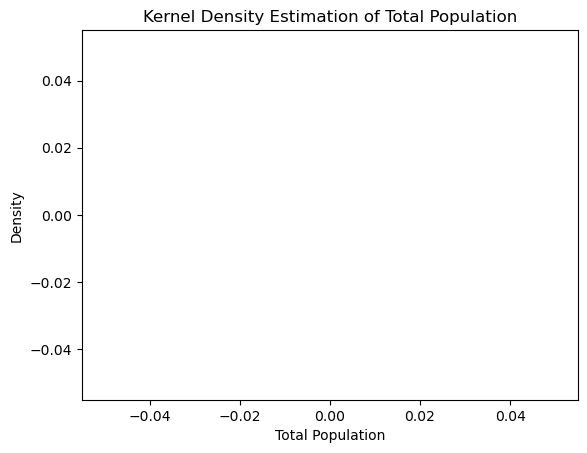

In [24]:
# Visualization for 'total_pop' column
sns.kdeplot(cases_sel['total_pop'], shade=True, color='orange')
plt.xlabel('Total Population')
plt.title('Kernel Density Estimation of Total Population')
plt.show()


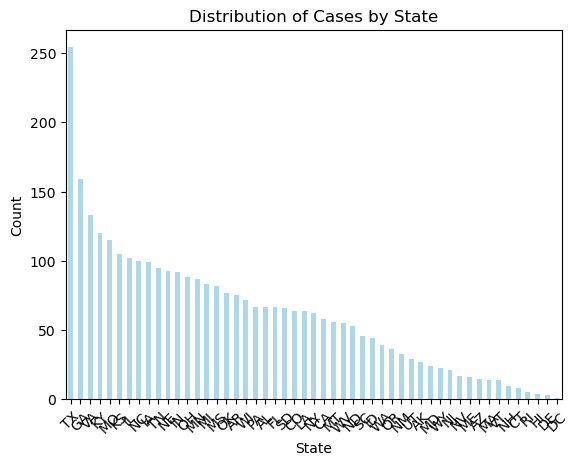

In [25]:
# Visualization for 'state' column (assuming 'state' is categorical)
cases_sel['state'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Cases by State')
plt.xticks(rotation=45)
plt.show()

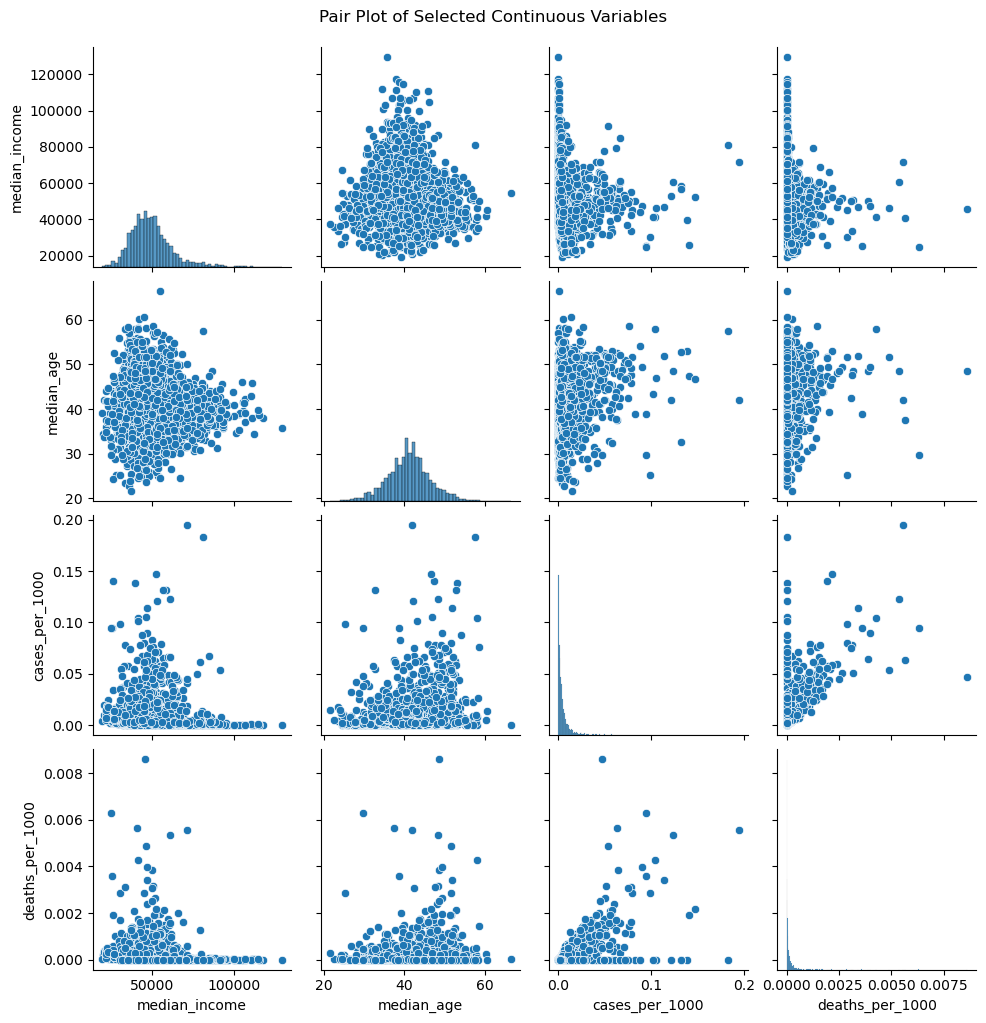

In [26]:
# Visualization using Seaborn's pairplot
sns.pairplot(cases_sel[['median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000']])
plt.suptitle('Pair Plot of Selected Continuous Variables', y=1.02)
plt.show()

In [35]:
!pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=c600d2d2af18f9185e03b287f61212fd52b4d57b17dd249b9aa12ed2a58b7366
  Stored in directory: c:\users\morga\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=39e97884b43cbf9fdbef76649cfab8465cf37333a3e82104d8d9060dae6868f0
  Stored in directory: c:\users\morga\appdata\local\pip\cache\wheels\12\f9\4d\ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


In [36]:
import pandas as pd
import umap
import matplotlib.pyplot as plt

# Initialize the UMAP reducer with desired parameters
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')

# Fit and transform the data to lower dimensions
umap_result = reducer.fit_transform(cases_sel[['median_income', 'median_age', 'cases_per_1000', 'deaths_per_1000']])

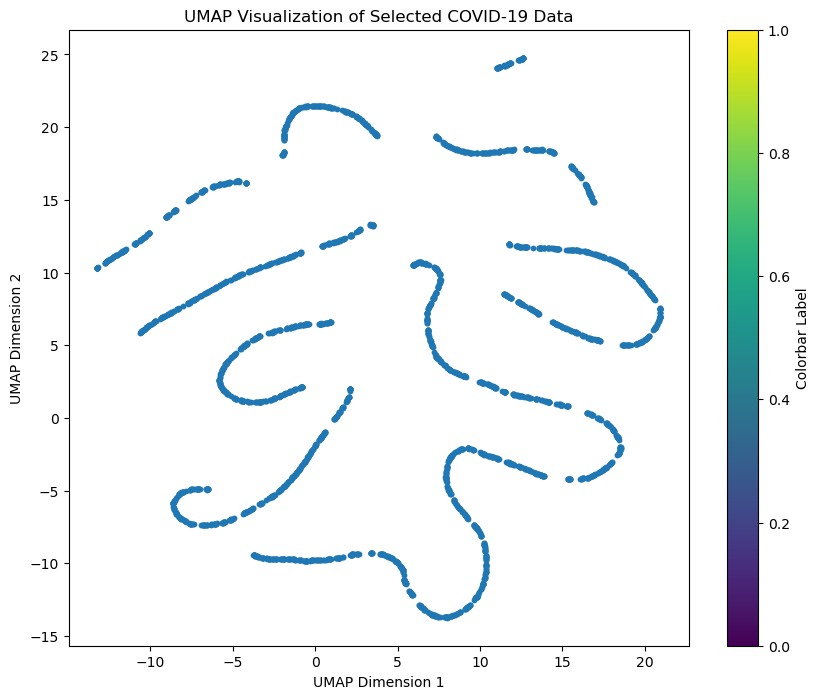

In [37]:
# Create a scatter plot to visualize the data in the reduced UMAP space
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', s=10)
plt.title('UMAP Visualization of Selected COVID-19 Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Colorbar Label')  # You can label the colorbar as needed
plt.show()